# Figures for Computation Time for Network Inference

Start by importing some packages and defining some functions.

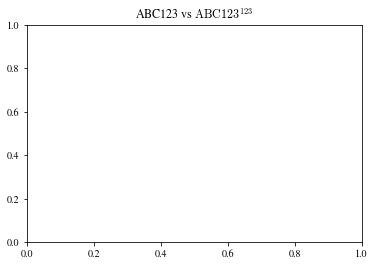

In [1]:
import sys, time
sys.path.append('../utils/')
from utils import *
import matplotlib as mpl
import matplotlib.pyplot as plt  

rcPhysRev(fontsize=10)

In the figure below, we show how computation scales up with observation time, network size, and maximum expected delay on edges. This figure appears in Section 6E of our paper.

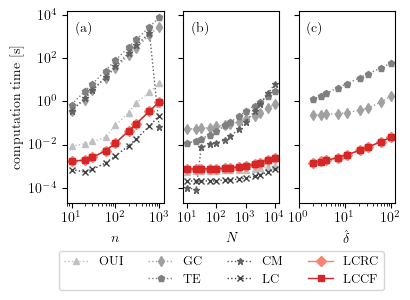

In [3]:
################################################################################
# In this figure, we show how computation scales up with observation time, 
# network size, and maximum expected delay on edges. This figure appears in 
# Section 6E of our paper.

t0 = time.time()
num_trials = 10

# set variables for x axis
x1 = Variable('n', [10, 20, 30, 60, 100, 200, 300, 600, 1000])
x2 = Variable('T', [10, 20, 30, 60, 100, 200, 300, 600, 1000, 
                    2000, 3000, 6000, 10000])
x3 = Variable('max_lag_inf', [2, 3, 4, 7, 11, 21, 31, 61, 101])
    
# make figure
fig, axes, legend = plot1d(ncols=3, nrows=1, y='time', num_trials=num_trials,
    xvars=[x1, x2, x3], verbose_lookup=False, 
    default_parameters={'T':2000}, load=True, save=True, verbose_sim=False,
    linevars=Variable('inference_method',
        ['OUI','GC','TE','CM','LC','LCCF','LCRC']),
    linevar_labels=['OUI','GC','TE','CM','LC','LCRC','LCCF'],
    add_subplotlabels=True, subplotlabelx=0.09, subplotlabely=0.89,                           
    linecolors=['#c0c0c0','#a0a0a0','#808080','#606060','#404040' ,
                'salmon', 'tab:red'],
    sharey=False, add_legend=False,
    linestyles=[':', ':', ':', ':', ':', '-', '-'], 
    linewidths=[1, 1, 1, 1, 1, 1, 1], 
    markers=['^', 'd', 'p', '*', 'x', 'D', 's'], markersizes=[5, 5, 5, 5, 5, 5, 5])

fig.set_size_inches([4,3])

if True:
    # remove lines from last plot    
    for i in [4,3,0]:
        axes[2].lines.pop(i)

    # make plots pretty
    for i in range(3):
        axes[i].set_yscale('log')
        axes[i].set_xscale('log')
        axes[i].xaxis.labelpad = 0
        axes[i].set_ylim([2E-5,14874])
        axes[i].set_yticks([1E-4,1E-2,1E0, 1E2, 1E4])
        if i==0:
            axes[i].set_ylabel('computation time [s]')
        else:
            axes[i].set_ylabel('')
            axes[i].set_yticklabels([])

        axes[0].set_xticks([10,100,1000])
        axes[1].set_xticks([10,100,1000,10000])
        axes[2].set_xticks([1,10,100])
        
    axes[0].plot([],[],color=(0,0,0,0), label=" ")[0]
    handles = [h for h in axes[0].lines]
    handles.insert(1, handles[-1])
    handles = handles[:-1]
    plt.sca(axes[0])
    le = plt.legend(handles=handles, 
        ncol=4, fontsize=9,
        bbox_to_anchor=(1.6, -0.22), 
        loc='upper center')#  loc=(1.1, 0))
    plt.subplots_adjust(left=0.16, right=0.98, bottom=0.35, top=0.99, 
                        hspace=0.22, wspace=0.2)
    
    axes[0].set_xlabel(r'$n$', labelpad=5)
    axes[1].set_xlabel(r'$N$', labelpad=5)
    axes[2].set_xlabel(r'$\hat\delta$', labelpad=5)

plt.savefig('../figures/resultsE1.pdf')
#print(time.time()-t0)